In [2]:
import tensorflow as tf
import os 
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
class NodeLookup():
    def __init__(self):
        label_lookup_path = '/Users/ruicheng/ipynb文件存储/tensorflowteset/inception_model/imagenet_2012_challenge_label_map_proto.pbtxt'
        uid_lookup_path = '/Users/ruicheng/ipynb文件存储/tensorflowteset/inception_model/imagenet_synset_to_human_label_map.txt'
        self.node_lookup = self.load(label_lookup_path, uid_lookup_path)
    
    def load(self, label_lookup_path, uid_lookup_path):
        # 加载分类字符转n*******对应各分类名称的文件
        proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines()
        uid_to_human={}
        # 一行一行读取数据
        for line in proto_as_ascii_lines:
            #去掉换行符
            line = line.strip('\n')
            #按照'\t'分割
            parsed_items = line.split('\t')
            #获取分类编号
            uid = parsed_items[0]
            #获取分类名称
            human_string = parsed_items[1]
            #保存分类编号字符串n*******与分类名映射关系
            uid_to_human[uid] = human_string
    
        # 加载分类字符串n*******对应分类编号1-1000的文件
        proto_as_ascii = tf.gfile.GFile(label_lookup_path).readlines()
        node_id_to_uid = {}
        for line in proto_as_ascii:
            if line.strip().startswith('target_class:'):
                target_class = int(line.strip().split(':')[1])
            elif line.strip().startswith('target_class_'):
                target_class_string = line.strip().split(':')[1].strip()
                node_id_to_uid[target_class] = target_class_string[1:-1]
        
        # 建立分类编号 1-1000 与对应分类名称的映射关系
        node_id_to_name = {}
        for key,val in node_id_to_uid.items():
            #获取分类名称
            name = uid_to_human[val]
            #建立分类编号1-1000到分类名称的映射关系
            node_id_to_name[key] = name
        
        return node_id_to_name
    
    # 传入分类编号1-1000 返回分类名称
    def id_to_string(self, node_id):
        if node_id not in self.node_lookup:
            return ''
        return self.node_lookup[node_id]   

/Users/ruicheng/ipynb文件存储/tensorflowteset/images/test_12.jpg


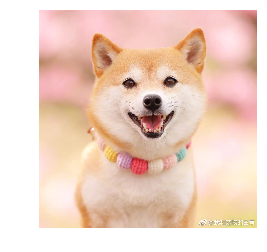

Pembroke, Pembroke Welsh corgi (score = 0.21048)
Eskimo dog, husky (score = 0.10217)
dingo, warrigal, warragal, Canis dingo (score = 0.05512)
Chihuahua (score = 0.03135)
Cardigan, Cardigan Welsh corgi (score = 0.03026)
/Users/ruicheng/ipynb文件存储/tensorflowteset/images/test_1.jpg


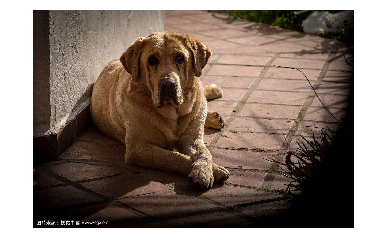

Rhodesian ridgeback (score = 0.26529)
Labrador retriever (score = 0.15317)
bath towel (score = 0.07593)
bull mastiff (score = 0.06573)
redbone (score = 0.02678)
/Users/ruicheng/ipynb文件存储/tensorflowteset/images/test_5.jpg


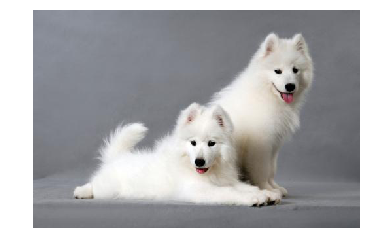

Samoyed, Samoyede (score = 0.94969)
Arctic fox, white fox, Alopex lagopus (score = 0.00197)
white wolf, Arctic wolf, Canis lupus tundrarum (score = 0.00172)
Eskimo dog, husky (score = 0.00158)
Siberian husky (score = 0.00070)
/Users/ruicheng/ipynb文件存储/tensorflowteset/images/test_6.jpg


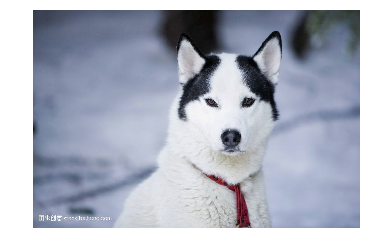

Eskimo dog, husky (score = 0.64732)
Siberian husky (score = 0.14448)
dogsled, dog sled, dog sleigh (score = 0.02361)
bath towel (score = 0.00327)
malamute, malemute, Alaskan malamute (score = 0.00118)


In [12]:
# 创建一个图来存放google训练好的模型
#.pb模型的读取和.ckpt的模型读取不一样，.ckpt用saver.restore读取
# classfy_image_graph_def.pb 为google训练好的模型
with tf.gfile.FastGFile('/Users/ruicheng/ipynb文件存储/tensorflowteset/inception_model/classify_image_graph_def.pb','rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

node_lookup = NodeLookup()

/Users/ruicheng/ipynb文件存储/tensorflowteset/images/test_12.jpg


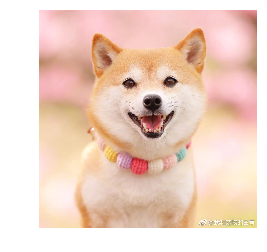

Pembroke, Pembroke Welsh corgi (score = 0.21048)
Eskimo dog, husky (score = 0.10217)
dingo, warrigal, warragal, Canis dingo (score = 0.05512)
Chihuahua (score = 0.03135)
Cardigan, Cardigan Welsh corgi (score = 0.03026)
/Users/ruicheng/ipynb文件存储/tensorflowteset/images/test_1.jpg


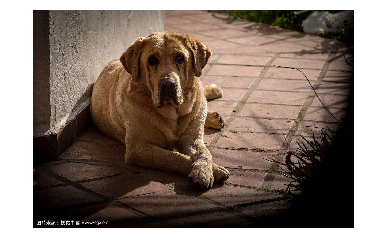

Rhodesian ridgeback (score = 0.26529)
Labrador retriever (score = 0.15317)
bath towel (score = 0.07593)
bull mastiff (score = 0.06573)
redbone (score = 0.02678)
/Users/ruicheng/ipynb文件存储/tensorflowteset/images/test_5.jpg


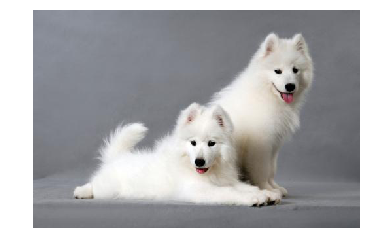

Samoyed, Samoyede (score = 0.94969)
Arctic fox, white fox, Alopex lagopus (score = 0.00197)
white wolf, Arctic wolf, Canis lupus tundrarum (score = 0.00172)
Eskimo dog, husky (score = 0.00158)
Siberian husky (score = 0.00070)
/Users/ruicheng/ipynb文件存储/tensorflowteset/images/test_6.jpg


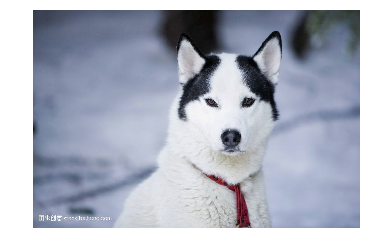

Eskimo dog, husky (score = 0.64732)
Siberian husky (score = 0.14448)
dogsled, dog sled, dog sleigh (score = 0.02361)
bath towel (score = 0.00327)
malamute, malemute, Alaskan malamute (score = 0.00118)


In [13]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    # 拿到softmax的op
    # 'softmax:0'这个名字，可以在网络中找到这个节点，它的名字就'(softmax)',
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')
    for root,dirs,files in os.walk('/Users/ruicheng/ipynb文件存储/tensorflowteset/images/'):
        for file in files:
            image_data = tf.gfile.FastGFile(os.path.join(root,file),'rb').read()
            # 运行softmax节点，向其中feed值
            # 可以在网络中找到这个名字，DecodeJpeg/contents，
            # 据此可以发现，根据名字取网络中op时，如果其名字带括号，就用括号内的名字，如果不带括号，就用右上角介绍的名字。
            # 而带个0，是默认情况，如果网络中出现同名节点，这个编号会递增
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0':image_data})
            predictions = np.squeeze(predictions)# 把结果转化为1维数据

            image_path = os.path.join(root, file)
            print(image_path)
            img = Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # 排序
            top_k = predictions.argsort()[-5:][::-1]
            for node_id in top_k:
                human_string = node_lookup.id_to_string(node_id)
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))